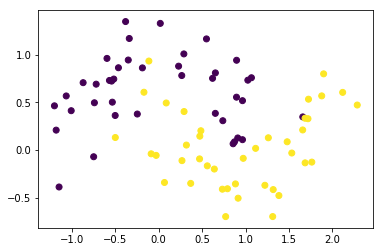

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

#### parameter
1) n_estimators : 트리의 수 in 숲  
2) criterion : gini or entropy  
3) max_depth : 최대 깊이 of tree.   
    If None, until all leaves are pure or less than min_samples_split samples  
4) min_samples_split  
5) max_features : 각 노드에서 선택하는 feature의 개수(무작위)  
6) n_jobs : 병렬 처리시 사용할 코어 수 (-1 : 모든 코어 사용)

In [7]:
model_forest = RandomForestClassifier(n_estimators=5, random_state=2, n_jobs=-1)
model_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [8]:
model_forest.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [9]:
model_forest.classes_

array([0, 1], dtype=int64)

In [10]:
model_forest.n_classes_

2

In [11]:
model_forest.n_features_

2

In [12]:
from matplotlib import pyplot as plt
import mglearn

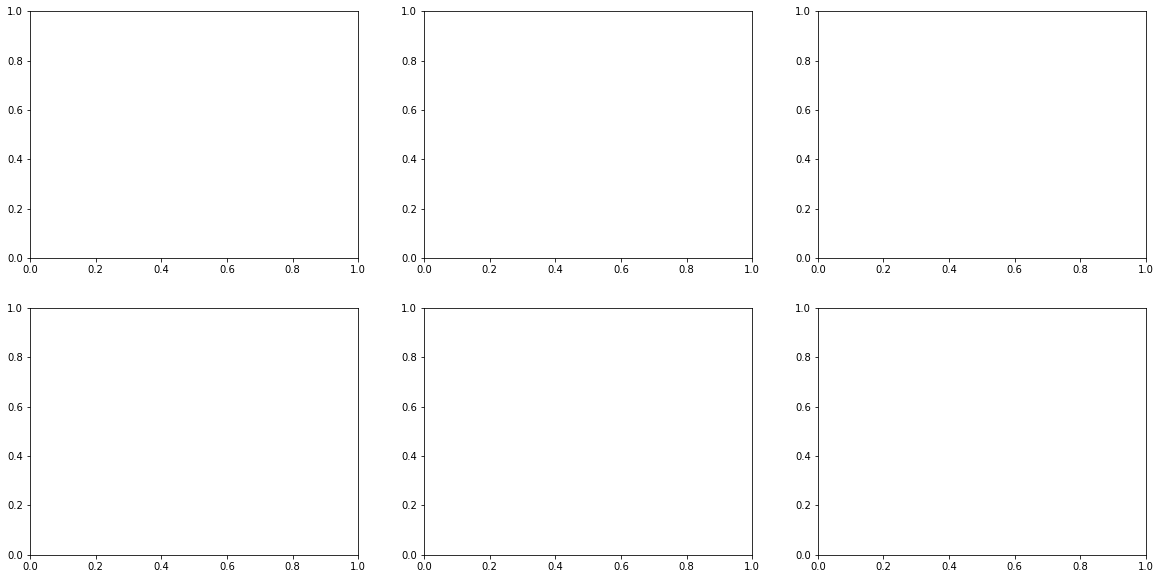

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

In [15]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DB8756588>,
      dtype=object)

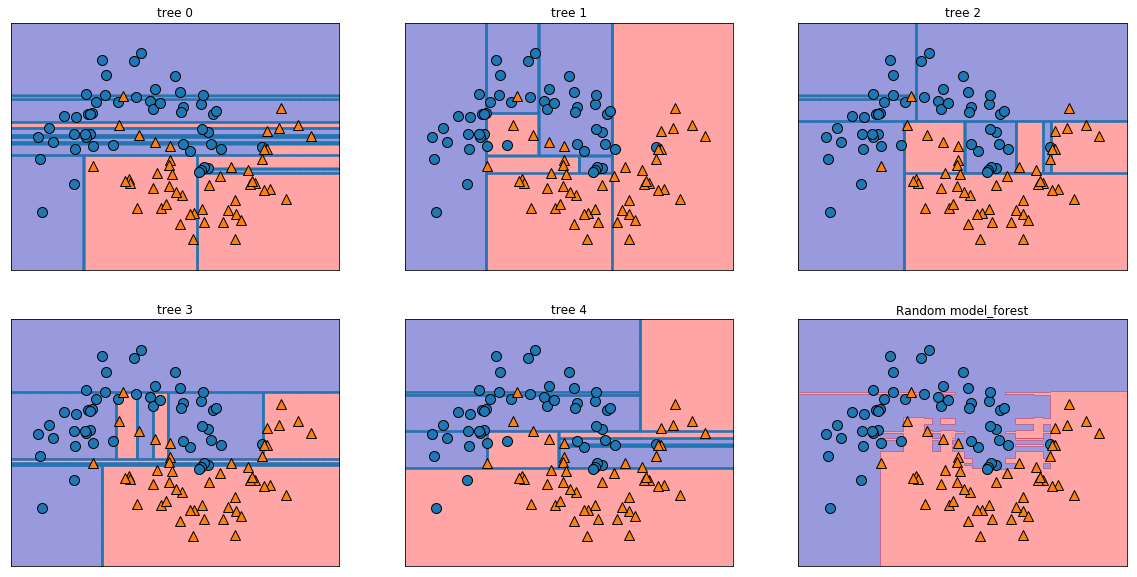

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), model_forest.estimators_)):
    
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(model_forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random model_forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [21]:
print("훈련 세트 정확도: {:.3f}".format(model_forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model_forest.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.900
